# Kernal Trick

- adding nonlinear features makes the model more powerful
- the features to add are unknown
- with kernal trick we compute distance(scalar products) of data points for the expanded feature representation
without computing the expansion

Two ways of mapping data in higher demension:
    1. polynomial kernal (computes all possible polynomials up to a certain degree)
    2. radial basis function(gaussian kernal) (infinite deminsion feature space )
        - considers all polynomials of all degrees, but places less importance on the higher degree features

# How SVM's work

- typically a subset of training points matter, these are the points lying on the border of two classes and are called support Vectors.  
- classification is made based on the dist of the support vectors and importance of the support vectors that were learned
- the distance between data points is measured by the Gaussian Kernel:


In [1]:
# standard modules we will always use
import pandas as pd
import numpy as np
import scipy as sp
import mglearn
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

In [13]:
data = pd.read_csv("happy.csv")
#display(data)
X = data.drop(columns = ["happy"])
Y = data['happy']

In [34]:
X2 = data[['X_1','X_5']].values
X3 = data[['X_1','X_2','X_5']].values
Y2 = Y.values

In [45]:
from sklearn.svm import LinearSVC as svc
lin_svm = svc().fit(X2,Y2)

/home/adir/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [46]:
X0 = X2[:,0]
X1 = X2[:,1]
X30 = X3[:,0]
X31 = X3[:,1]

Text(0, 0.5, 'feature 1')

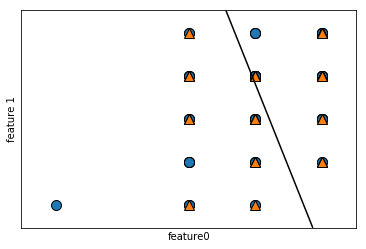

In [47]:
mglearn.plots.plot_2d_separator(lin_svm,X2)
mglearn.discrete_scatter(X0,X1,Y)
plt.xlabel('feature0')
plt.ylabel('feature 1')

In [48]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

/home/adir/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature 2')

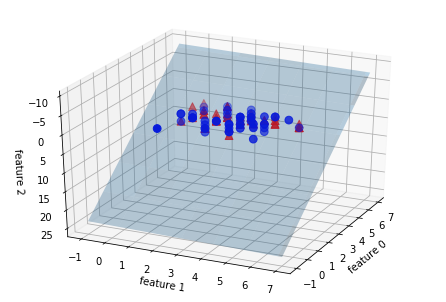

In [49]:
lin_svm_3d = svc().fit(X3,Y2)
coef, intercept = lin_svm_3d.coef_.ravel(), lin_svm_3d.intercept_

figure = plt.figure()
# visualize in 3d

ax = Axes3D(figure, elev = -152, azim = -25)
xx = np.linspace(X30.min() - 2, X30.max() + 2, 50)
yy = np.linspace(X31.min() - 2, X31.max() + 2, 50)


XX, YY = np.meshgrid(xx,yy)
ZZ = (coef[0]*XX + coef[1]*YY + intercept)/ -coef[2]
# plot first all the points with y == 0 then all with y == 1
mask = Y == 0
ax.plot_surface(XX, YY, ZZ, rstride = 8, cstride = 8 , alpha = 0.3)
ax.scatter(X3[mask,0], X3[mask, 1], X3[mask,2], c = 'b',
          cmap = mglearn.cm2, s = 60)
ax.scatter(X3[~mask, 0], X3[~mask, 1], X3[~mask, 2], c ='r', marker = '^',
          cmap = mglearn.cm2, s = 60)
ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature 2')


Text(0, 0.5, 'feature 1')

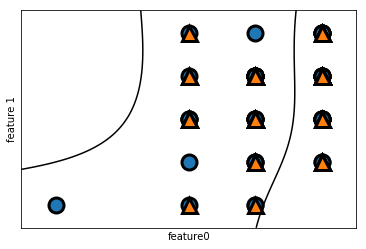

In [51]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', C = 10, gamma = 0.1).fit(X2,Y2)

mglearn.plots.plot_2d_separator(svm,X2)
mglearn.discrete_scatter(X0,X1,Y)
plt.xlabel('feature0')
plt.ylabel('feature 1')

# plot the support vectors
sv = svm.support_vectors_

# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0],sv[:,1], sv_labels, s =15, markeredgewidth = 3)
plt.xlabel('feature0')
plt.ylabel('feature 1')



# parameters in SVM

1. gamma,  which controls the width of the gaussian kernal
2. C is a regularizer parameter which limits importance of each point (dual_coef) - distance and importance

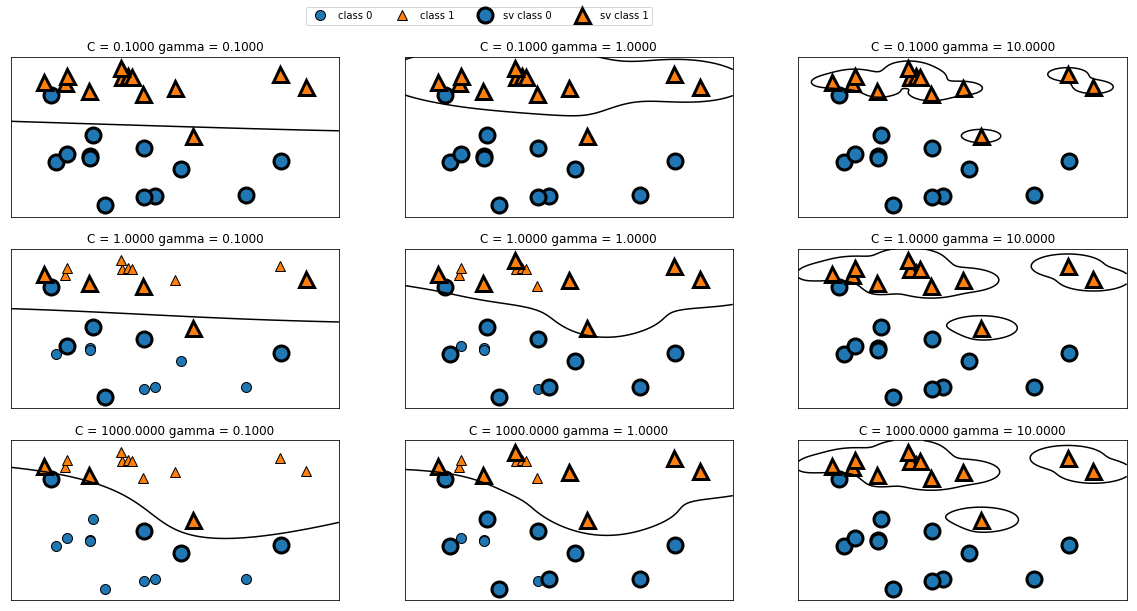

In [52]:
# Tuning parameters  
# small gamma means large radius so many points are considered, making a smooth line
# the larger the gamma, smaller radius and individual points are more important (overfitting)
# for small C each data point only has limited influence while larger means more indvidiual weights overfitting

fig, axes = plt.subplots(3,3, figsize= (20,10))
for ax, C in zip(axes, [-1,0,3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C = C, log_gamma = gamma, ax = a)
    

axes[0,0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
               ncol = 4, loc = (.9, 1.2))


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state = 42)

In [54]:
sv_c = SVC()
sv_c.fit(X_train, y_train)
print('Training accuracy: {:.3f}'.format(sv_c.score(X_train,y_train)))
print('Test accuracy: {:.3f}'.format(sv_c.score(X_test,y_test)))

Training accuracy: 0.748
Test accuracy: 0.500


/home/adir/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


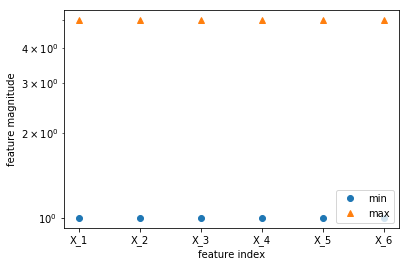

In [55]:
# very similar orders of magnitidues for the happiness index survey

plt.plot(X_train.min(axis = 0), 'o', label = 'min')
plt.plot(X_train.max(axis = 0), '^', label = 'max')
plt.legend(loc = 4)
plt.xlabel('feature index')
plt.ylabel('feature magnitude')
plt.yscale('log')

In [56]:
# remember that if data is not scaled correctly you should attempt to normalize the data
# page 104 has a solution for different scales of data

# strengths and weaknesses

- perform well on low/high demensional data
-  challenging to run on large data sets, i.e 100,000 
- require careful preprossing, ensure that the scales fore features are similar
- most people use tree-based models instead of SVC because of the computational issues